In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

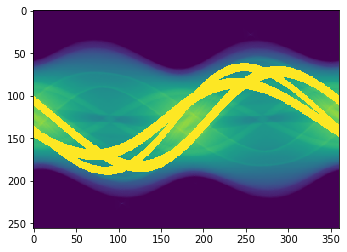

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size-1):
    for j in range(100-window_size):
        if 0 in result_img[i:i+window_size+1,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size+1,j:j+window_size]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 64)          128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 128)         8320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         16512     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [8]:
k = 0

for i in range(256-window_size-1):
    for j in range(100-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(19841, 3, 3, 1)
(19841, 1)
Epoch 1/1000
621/621 [==============================] - 1s 2ms/step - loss: 3.3937 - accuracy: 0.3823
Epoch 2/1000
621/621 [==============================] - 1s 2ms/step - loss: 3.0470 - accuracy: 0.4095
Epoch 3/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.8832 - accuracy: 0.4117
Epoch 4/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.6260 - accuracy: 0.4192
Epoch 5/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.4239 - accuracy: 0.4259
Epoch 6/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.2718 - accuracy: 0.4324
Epoch 7/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.1826 - accuracy: 0.4385
Epoch 8/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.1226 - accuracy: 0.4387
Epoch 9/1000
621/621 [==============================] - ETA: 0s - loss: 2.0671 - accuracy: 0.44 - 1s 2ms/step - loss: 2.0680 - accuracy: 0.4418
Epoch 10/100

621/621 [==============================] - 1s 2ms/step - loss: 1.5729 - accuracy: 0.4978
Epoch 80/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5545 - accuracy: 0.5002
Epoch 81/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5447 - accuracy: 0.4996
Epoch 82/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5370 - accuracy: 0.5037
Epoch 83/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5354 - accuracy: 0.5059
Epoch 84/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5422 - accuracy: 0.5006
Epoch 85/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5356 - accuracy: 0.5037
Epoch 86/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5330 - accuracy: 0.5016
Epoch 87/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5214 - accuracy: 0.5062
Epoch 88/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5241 - a

621/621 [==============================] - 1s 2ms/step - loss: 1.4056 - accuracy: 0.5285
Epoch 159/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4040 - accuracy: 0.5293
Epoch 160/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4098 - accuracy: 0.5256
Epoch 161/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3988 - accuracy: 0.5299
Epoch 162/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4040 - accuracy: 0.5282
Epoch 163/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4018 - accuracy: 0.5295
Epoch 164/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3994 - accuracy: 0.5320
Epoch 165/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3969 - accuracy: 0.5299
Epoch 166/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3973 - accuracy: 0.5326
Epoch 167/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.3166 - accuracy: 0.5446
Epoch 237/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3257 - accuracy: 0.5434
Epoch 238/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3275 - accuracy: 0.5434
Epoch 239/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3252 - accuracy: 0.5453
Epoch 240/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3323 - accuracy: 0.5407
Epoch 241/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3135 - accuracy: 0.5468
Epoch 242/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3360 - accuracy: 0.5418
Epoch 243/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3360 - accuracy: 0.5451
Epoch 244/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3218 - accuracy: 0.5445
Epoch 245/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2926 - accuracy: 0.5501
Epoch 315/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2862 - accuracy: 0.5539
Epoch 316/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3295 - accuracy: 0.5478
Epoch 317/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2818 - accuracy: 0.5552
Epoch 318/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2985 - accuracy: 0.5482
Epoch 319/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2886 - accuracy: 0.5516
Epoch 320/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2923 - accuracy: 0.5517
Epoch 321/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3055 - accuracy: 0.5528
Epoch 322/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2884 - accuracy: 0.5531
Epoch 323/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2651 - accuracy: 0.5575
Epoch 393/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2562 - accuracy: 0.5594
Epoch 394/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2612 - accuracy: 0.5591
Epoch 395/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2607 - accuracy: 0.5578
Epoch 396/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2664 - accuracy: 0.5601
Epoch 397/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2664 - accuracy: 0.5592
Epoch 398/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2670 - accuracy: 0.5591
Epoch 399/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2584 - accuracy: 0.5561
Epoch 400/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2617 - accuracy: 0.5574
Epoch 401/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2416 - accuracy: 0.5649
Epoch 471/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2394 - accuracy: 0.5633
Epoch 472/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2363 - accuracy: 0.5636
Epoch 473/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2272 - accuracy: 0.5676
Epoch 474/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2277 - accuracy: 0.5683
Epoch 475/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2712 - accuracy: 0.5612
Epoch 476/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2456 - accuracy: 0.5648
Epoch 477/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2296 - accuracy: 0.5658
Epoch 478/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2783 - accuracy: 0.5643
Epoch 479/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2240 - accuracy: 0.5686
Epoch 549/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2225 - accuracy: 0.5692
Epoch 550/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2359 - accuracy: 0.5664
Epoch 551/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2082 - accuracy: 0.5736
Epoch 552/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2160 - accuracy: 0.5709
Epoch 553/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2086 - accuracy: 0.5742
Epoch 554/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2211 - accuracy: 0.5718
Epoch 555/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2181 - accuracy: 0.5707
Epoch 556/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2136 - accuracy: 0.5719
Epoch 557/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.1817 - accuracy: 0.5838
Epoch 627/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1997 - accuracy: 0.5777
Epoch 628/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3294 - accuracy: 0.5692
Epoch 629/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1826 - accuracy: 0.5792
Epoch 630/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1879 - accuracy: 0.5812
Epoch 631/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1949 - accuracy: 0.5768
Epoch 632/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2003 - accuracy: 0.5743
Epoch 633/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2116 - accuracy: 0.5698
Epoch 634/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1949 - accuracy: 0.5719
Epoch 635/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.1882 - accuracy: 0.5790
Epoch 705/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1661 - accuracy: 0.5839
Epoch 706/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1911 - accuracy: 0.5762
Epoch 707/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2055 - accuracy: 0.5722
Epoch 708/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4611 - accuracy: 0.5599
Epoch 709/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1778 - accuracy: 0.5824
Epoch 710/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1811 - accuracy: 0.5806
Epoch 711/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2135 - accuracy: 0.5750
Epoch 712/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1656 - accuracy: 0.5825
Epoch 713/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.1871 - accuracy: 0.5790
Epoch 783/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1598 - accuracy: 0.5850
Epoch 784/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2093 - accuracy: 0.5794
Epoch 785/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1597 - accuracy: 0.5906
Epoch 786/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1777 - accuracy: 0.5833
Epoch 787/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1563 - accuracy: 0.5903
Epoch 788/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1831 - accuracy: 0.5817
Epoch 789/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1875 - accuracy: 0.5799
Epoch 790/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1705 - accuracy: 0.5808
Epoch 791/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.1768 - accuracy: 0.5824
Epoch 861/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1595 - accuracy: 0.5886
Epoch 862/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1573 - accuracy: 0.5869
Epoch 863/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1535 - accuracy: 0.5848
Epoch 864/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1550 - accuracy: 0.5876
Epoch 865/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1643 - accuracy: 0.5872
Epoch 866/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1476 - accuracy: 0.5888
Epoch 867/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1608 - accuracy: 0.5868
Epoch 868/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1753 - accuracy: 0.5880
Epoch 869/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.1551 - accuracy: 0.5881
Epoch 939/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1363 - accuracy: 0.5922
Epoch 940/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1587 - accuracy: 0.5821
Epoch 941/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1388 - accuracy: 0.5897
Epoch 942/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1747 - accuracy: 0.5836
Epoch 943/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1651 - accuracy: 0.5855
Epoch 944/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1457 - accuracy: 0.5925
Epoch 945/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1420 - accuracy: 0.5892
Epoch 946/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.1425 - accuracy: 0.5907
Epoch 947/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

In [9]:
for i in range(256-window_size-1):
    for j in range(100-window_size):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])

213
211
211
211
219
211
211
219
240
211
219
219
240
240
211
240
219
245
240
240
229
211
240
223
245
245
240
240
240
203
240
240
245
245
245
245
240
240
203
240
240
240
245
245
245
245
240
240
207
240
240
240
240
240
245
245
245
240
240
213
240
240
240
240
240
240
245
245
245
245
240
240
213
240
240
240
240
240
240
240
245
245
245
245
240
240
240
240
240
240
240
240
240
240
245
245
245
245
240
240
240
240
240
240
240
240
240
240
240
240
245
245
240
240
240
240
240
240
240
240
240
240
240
240
245
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
245
240
240
219
240
240
240
240
240
240
240
240
240
240
240
211
219
240
240
240
240
240
240
240
240
240
240
208
213
219
240
240
240
240
240
240
240
240
230
207
211
219
219
240
240
240
240
240
240
240
219
208
211
219
219
223
240
240
240
240
240
240
212
211
211
219
219
219
219
211
240
240
240
240
211
211
211
219
213
211
212
208
208
240
240
240
211
211
208
212
202
202
208
203
203
208
240
240
209


159
142
183
173
173
173
173
173
173
163
153
163
163
163
147
23
54
16
19
23
14
45
33
249
22
24
19
11
32
29
1
1
44
248
19
44
232
173
183
173
173
183
173
173
173
173
173
174
159
163
155
152
147
248
19
19
18
4
31
1
1
1
42
246
1
44
232
173
173
183
173
173
173
173
173
173
155
159
147
147
92
163
154
5
7
34
91
2
1
19
38
246
1
44
232
173
183
173
173
173
173
169
173
150
155
139
92
23
163
153
156
150
152
28
102
18
20
19
117
249
19
44
232
173
173
173
173
163
173
147
147
23
16
16
163
150
155
147
150
150
150
23
19
16
1
229
248
19
44
232
173
173
173
159
173
23
53
19
46
46
163
147
155
147
150
150
150
150
150
147
42
44
251
246
1
44
232
173
42
93
16
58
79
46
46
163
147
155
147
150
150
150
150
150
147
150
147
147
251
246
1
44
232
51
47
46
3
1
44
163
147
155
147
150
150
150
150
150
147
150
147
147
147
141
141
141
147
19
44
232
14
14
38
44
163
147
155
147
150
150
150
150
150
147
150
147
147
147
136
136
139
147
141
147
147
147
147
117
23
103
28
19
44
232
16
38
44
163
147
155
147
150
150
150
150
150
147
150


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

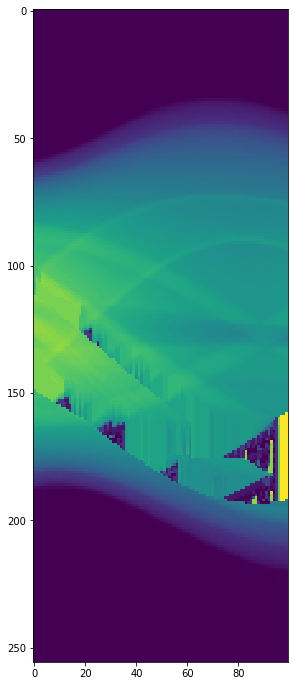

In [10]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:100])
plt.colorbar

In [ ]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [207]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)